In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
df=pd.read_csv('./all_seasons.csv')

In [3]:
test_feat=['gp','net_rating']
df.loc[df.player_name=='Bruce Bowen', test_feat]

,gp,net_rating
163,1,300.0
769,61,0.4
882,30,-3.9
1513,69,3.0
1892,82,3.1
2502,59,11.3
2690,82,8.9
3342,82,8.7
3763,82,9.5
4215,82,8.7


In [4]:
(df.loc[(df['gp']==1)&(df['net_rating']>20)])

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
163,163,Bruce Bowen,MIA,26.0,200.66,90.718400,Cal State-Fullerton,USA,Undrafted,Undrafted,...,0.0,0.0,0.0,300.0,0.000,0.000,0.000,0.000,0.000,1996-97
1008,1008,Tyson Wheeler,DEN,23.0,177.80,74.842680,Rhode Island,USA,1998,2,...,4.0,0.0,2.0,62.2,0.000,0.000,0.320,1.064,0.667,1998-99
1687,1687,Mario Bennett,LAC,26.0,198.12,106.594120,Arizona State,USA,1995,1,...,0.0,2.0,0.0,32.7,0.143,0.250,0.276,0.000,0.000,1999-00
1725,1725,Randell Jackson,DAL,24.0,210.82,97.522280,Florida State,USA,1999,Undrafted,...,0.0,0.0,0.0,60.4,0.000,0.000,0.000,0.000,0.000,1999-00
1788,1788,David Wingate,SEA,37.0,195.58,84.821704,Georgetown,USA,1986,2,...,6.0,0.0,2.0,70.6,0.000,0.000,0.140,1.000,0.286,2000-01
2651,2651,Chris Owens,MEM,24.0,200.66,111.130040,Texas,USA,2002,2,...,4.0,1.0,0.0,39.1,0.333,0.000,0.288,0.667,0.000,2002-03
4226,4226,Bryon Russell,DEN,35.0,200.66,102.058200,Long Beach State,USA,1993,2,...,0.0,1.0,1.0,60.0,0.000,0.500,0.000,0.000,0.333,2005-06
4710,4710,Renaldo Major,GSW,25.0,200.66,86.182480,Fresno State,USA,Undrafted,Undrafted,...,5.0,2.0,0.0,21.5,0.000,0.091,0.171,0.230,0.000,2006-07
4733,4733,Von Wafer,LAC,21.0,195.58,95.254320,Florida State,USA,2005,2,...,0.0,0.0,0.0,26.6,0.000,0.000,0.275,0.000,0.000,2006-07
5738,5738,Steven Hill,OKC,23.0,213.36,111.130040,Arkansas,USA,Undrafted,Undrafted,...,2.0,3.0,0.0,79.0,0.400,0.500,0.101,1.000,0.000,2008-09


In [5]:
df.draft_year.unique()

array(['1986', '1990', '1979', '1995', '1985', '1981', '1994', '1992',
       '1991', 'Undrafted', '1983', '1988', '1996', '1993', '1989',
       '1987', '1982', '1984', '1980', '1976', '1978', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '1963', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'], dtype=object)

<AxesSubplot:xlabel='draft_year'>

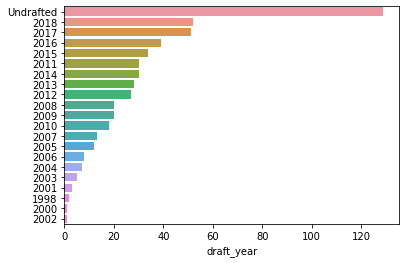

In [6]:
sns.barplot(y=df.loc[df.season=='2018-19'].draft_year.value_counts().index, x=df.loc[df.season=='2018-19'].draft_year.value_counts())

In [7]:
total_player=len(df.loc[df.season=='2018-19'].player_name.unique())

undrafted_player=len(df.loc[(df.season=='2018-19')&(df.draft_year=='Undrafted')].player_name.unique())

prcntg=100*(undrafted_player/total_player)

print(prcntg)

24.339622641509433


In [8]:
df.drop(df[df.draft_year<'1995'].index, inplace=True)

In [9]:
df['draft_number'].replace('Undrafted', '82', inplace=True)
df['draft_number'].replace('82', '61', inplace=True)
df['draft_number']=pd.to_numeric(df['draft_number'])

In [10]:
df_player=df[['player_name','gp']].groupby('player_name').sum().reset_index()
df_player=df_player.loc[df_player['gp']<5]
for p in df_player['player_name']:
    df.drop(df[df.player_name==p].index, inplace=True)

In [11]:
stats=['gp','pts','reb','ast','net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct']
avg_per_pick=df.groupby(['draft_number'])[stats].mean().reset_index()
avg_per_player=df.groupby(['player_name','draft_number'])[stats].mean().reset_index()

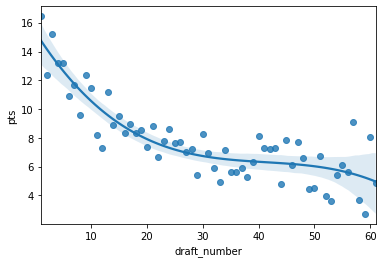

In [12]:
sns.regplot(x='draft_number', y='pts', data=avg_per_pick, order=3)
plt.show()

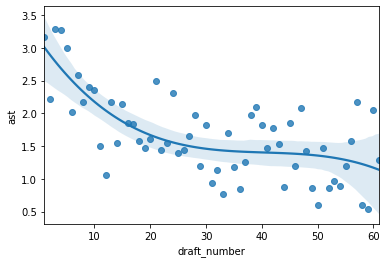

In [13]:
sns.regplot(x='draft_number', y='ast', data=avg_per_pick, order=3)
plt.show()

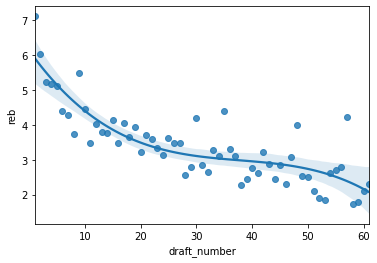

In [14]:
sns.regplot(x='draft_number', y='reb', data=avg_per_pick, order=3)
plt.show()

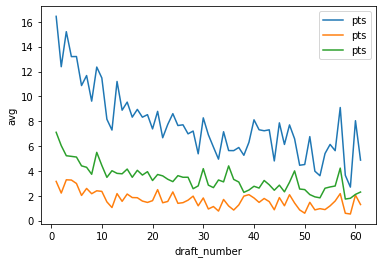

In [15]:
ax=sns.lineplot(x='draft_number', y='pts', data=avg_per_pick, label='pts')
ax=sns.lineplot(x='draft_number', y='ast', data=avg_per_pick, label='pts')
ax=sns.lineplot(x='draft_number', y='reb', data=avg_per_pick, label='pts')
ax.set(ylabel='avg')
ax.legend()
plt.show()

In [16]:
avg_per_pick[['draft_number', 'pts','ast','reb']][:15]

,draft_number,pts,ast,reb
0,1,16.445417,3.158333,7.110833
1,2,12.390541,2.219820,6.038739
2,3,15.210549,3.286920,5.224051
3,4,13.204167,3.267917,5.173750
4,5,13.210040,2.990763,5.118474
5,6,10.873054,2.026946,4.410180
6,7,11.679399,2.591416,4.293562
7,8,9.618932,2.166990,3.732039
8,9,12.362150,2.401869,5.496262
9,10,11.487391,2.355217,4.445652


In [17]:
avg_per_pick[['draft_number', 'pts','ast','reb']][-5:]

,draft_number,pts,ast,reb
56,57,9.105405,2.175676,4.227027
57,58,3.651724,0.593103,1.737931
58,59,2.700000,0.533333,1.800000
59,60,8.044000,2.056000,2.112000
60,61,4.872002,1.294791,2.302008


In [18]:
avg_per_player[avg_per_player.draft_number==57]

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
317,Corsley Edwards,57,10.000000,2.700000,2.500000,0.300000,-14.600000,0.112000,0.149000,0.166000,0.372000,0.057000
509,Drew Barry,57,20.000000,2.300000,1.100000,1.866667,2.266667,0.014667,0.100000,0.125333,0.570667,0.275000
896,Jordan Bone,57,10.000000,1.200000,0.400000,0.800000,-2.900000,0.000000,0.091000,0.171000,0.300000,0.235000
998,Kevin Hervey,57,7.000000,0.300000,0.300000,0.100000,-13.300000,0.000000,0.100000,0.220000,0.091000,0.100000
1130,Manu Ginobili,57,66.062500,13.150000,3.481250,3.781250,10.225000,0.029312,0.127000,0.236563,0.580875,0.238313
1135,Marcin Gortat,57,67.166667,9.183333,7.458333,1.058333,0.816667,0.105167,0.247917,0.169500,0.566250,0.067167
1501,Ryan Reid,57,5.000000,1.600000,0.400000,0.000000,15.000000,0.071000,0.077000,0.163000,0.800000,0.000000
1667,Torraye Braggs,57,11.000000,1.800000,2.150000,0.250000,-5.750000,0.262500,0.227000,0.183000,0.475500,0.041500


In [19]:
avg_per_player[avg_per_player.draft_number==60]

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
37,Alex Acker,60,15.000000,2.350000,1.000000,0.650000,-21.300000,0.039000,0.115000,0.215500,0.364500,0.140500
321,Cory Jefferson,60,29.000000,3.250000,2.450000,0.150000,-1.700000,0.111500,0.198000,0.191500,0.463000,0.023500
684,Isaiah Thomas,60,58.333333,16.522222,2.266667,4.566667,-1.822222,0.019778,0.069000,0.263778,0.551667,0.264667
1028,Kostas Antetokounmpo,60,2.500000,0.500000,0.400000,0.150000,0.450000,0.000000,0.222000,0.120000,0.105000,0.083500
1450,Robert Sacre,60,47.250000,3.700000,2.850000,0.600000,-6.800000,0.076500,0.147750,0.144250,0.460750,0.066250
1532,Semih Erden,60,34.500000,3.750000,2.750000,0.400000,-6.400000,0.074500,0.183000,0.142500,0.565500,0.051500
1714,Tyrone Wallace,60,35.333333,5.366667,2.233333,1.333333,-2.033333,0.023333,0.108333,0.162333,0.452000,0.109333
1756,Will Blalock,60,14.000000,1.800000,1.100000,1.200000,-6.700000,0.038000,0.066000,0.120000,0.383000,0.193000


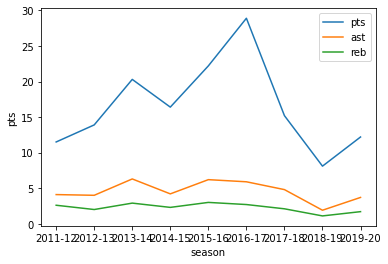

In [20]:
ax=sns.lineplot(x='season', y='pts', data=df.loc[df['player_name']=='Isaiah Thomas'], label='pts')
ax=sns.lineplot(x='season', y='ast', data=df.loc[df['player_name']=='Isaiah Thomas'], label='ast')
ax=sns.lineplot(x='season', y='reb', data=df.loc[df['player_name']=='Isaiah Thomas'], label='reb')

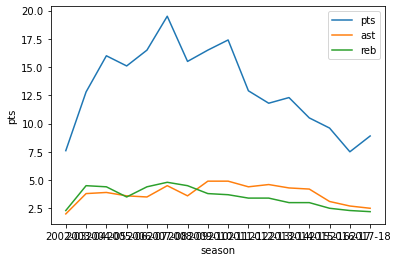

In [21]:
ax=sns.lineplot(x='season', y='pts', data=df.loc[df['player_name']=='Manu Ginobili'], label='pts')
ax=sns.lineplot(x='season', y='ast', data=df.loc[df['player_name']=='Manu Ginobili'], label='ast')
ax=sns.lineplot(x='season', y='reb', data=df.loc[df['player_name']=='Manu Ginobili'], label='reb')

In [22]:
def score(a, b):
    sum=0.0
    for i in range(1, len(a)):
        sum += (b[i+1]-a[i])
    return (sum)

In [23]:
dist=[]

for p in range(avg_per_player.shape[0]):
    val=score(avg_per_pick.loc[avg_per_player.loc[p][1]-1], avg_per_player.loc[p])
    dist.append(val)

avg_per_player['score']=dist

In [24]:
avg_per_player.loc[avg_per_player.groupby('draft_number')['score'].idxmax()]

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
1072,LeBron James,1,73.882353,27.064706,7.447059,7.441176,7.205882,0.036176,0.182000,0.312882,0.587471,0.352941,34.393126
996,Kevin Durant,2,70.750000,26.883333,7.075000,4.125000,5.975000,0.022417,0.179750,0.296167,0.614417,0.192417,33.399405
739,James Harden,3,74.909091,25.154545,5.300000,6.263636,6.136364,0.025091,0.138818,0.297000,0.608545,0.306909,29.916734
1491,Russell Westbrook,4,72.666667,23.408333,7.083333,8.225000,5.400000,0.052583,0.160417,0.320750,0.528167,0.398500,33.240575
997,Kevin Garnett,5,69.100000,17.350000,9.830000,3.630000,5.565000,0.071100,0.263900,0.240600,0.540250,0.182000,20.345175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,Manu Ginobili,57,66.062500,13.150000,3.481250,3.781250,10.225000,0.029312,0.127000,0.236563,0.580875,0.238313,23.699198
1445,Robbie Hummel,58,49.000000,3.900000,2.750000,0.500000,-4.800000,0.052000,0.166500,0.123500,0.514000,0.055000,20.148414
336,DJ Strawberry,59,33.000000,2.200000,0.800000,0.900000,-3.200000,0.034000,0.073000,0.189000,0.364000,0.165000,7.551333
684,Isaiah Thomas,60,58.333333,16.522222,2.266667,4.566667,-1.822222,0.019778,0.069000,0.263778,0.551667,0.264667,32.584076


In [25]:
avg_per_player.loc[avg_per_player.draft_number==1].sort_values('score', ascending=False).head(5)

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
1072,LeBron James,1,73.882353,27.064706,7.447059,7.441176,7.205882,0.036176,0.182000,0.312882,0.587471,0.352941,34.393126
1639,Tim Duncan,1,73.263158,18.889474,10.768421,3.010526,9.747368,0.097105,0.262632,0.267316,0.548421,0.158895,26.893795
960,Karl-Anthony Towns,1,71.600000,23.120000,11.660000,2.980000,0.500000,0.094600,0.263400,0.260800,0.623600,0.143800,21.126679
139,Ben Simmons,1,71.333333,16.466667,8.233333,8.033333,3.733333,0.056333,0.169333,0.213000,0.582333,0.347667,19.049146
96,Anthony Davis,1,64.875000,23.950000,10.387500,2.275000,1.262500,0.080375,0.237625,0.278875,0.586625,0.112125,13.926104


In [26]:
avg_per_player.loc[avg_per_player.draft_number==2].sort_values('score', ascending=False).head(5)

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
996,Kevin Durant,2,70.750000,26.883333,7.075000,4.125000,5.975000,0.022417,0.179750,0.296167,0.614417,0.192417,33.399405
1048,LaMarcus Aldridge,2,71.571429,19.464286,8.307143,1.971429,3.700000,0.088500,0.185571,0.257500,0.543571,0.100000,23.475334
1237,Mike Bibby,2,71.500000,14.178571,3.021429,5.414286,0.657143,0.017143,0.088000,0.203571,0.526357,0.260286,13.152691
1583,Steve Francis,2,64.000000,16.622222,5.188889,5.633333,-0.577778,0.050000,0.115000,0.239556,0.522222,0.272889,9.352239
974,Keith Van Horn,2,63.888889,16.066667,6.733333,1.533333,0.355556,0.068111,0.175111,0.240778,0.535333,0.083889,6.966905


In [27]:
avg_per_player.loc[avg_per_player.draft_number==3].sort_values('score', ascending=False).head(5)

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
739,James Harden,3,74.909091,25.154545,5.300000,6.263636,6.136364,0.025091,0.138818,0.297000,0.608545,0.306909,29.916734
802,Jayson Tatum,3,72.000000,17.700000,6.033333,2.233333,8.233333,0.025333,0.154667,0.229667,0.565667,0.105667,18.057734
1101,Luka Doncic,3,61.500000,24.800000,8.600000,7.350000,1.850000,0.037000,0.210500,0.327000,0.564000,0.384000,16.399234
234,Carmelo Anthony,3,65.470588,23.017647,6.458824,2.800000,1.294118,0.051706,0.151824,0.296353,0.536941,0.140647,10.995381
448,Deron Williams,3,70.416667,16.358333,3.100000,8.025000,1.000000,0.014083,0.092833,0.235500,0.548583,0.378667,10.946401


In [28]:
avg_per_player.loc[avg_per_player.draft_number==4].sort_values('score', ascending=False).head(5)

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
1491,Russell Westbrook,4,72.666667,23.408333,7.083333,8.225000,5.400000,0.052583,0.160417,0.320750,0.528167,0.398500,33.240575
289,Chris Paul,4,67.466667,18.406667,4.506667,9.440000,7.280000,0.021133,0.125333,0.236133,0.582200,0.431067,23.492692
270,Chris Bosh,4,68.692308,19.392308,8.438462,2.046154,3.746154,0.071000,0.205615,0.248846,0.569154,0.098923,18.505748
1412,Rasheed Wallace,4,69.600000,14.273333,6.626667,1.740000,6.400000,0.051000,0.195600,0.218000,0.533733,0.089867,14.725025
1049,Lamar Odom,4,68.642857,13.271429,8.192857,3.771429,1.914286,0.063286,0.213000,0.200429,0.522286,0.183000,11.971682


In [29]:
avg_per_player.loc[avg_per_player.draft_number==5].sort_values('score', ascending=False).head(5)

,player_name,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,score
997,Kevin Garnett,5,69.100000,17.350000,9.830000,3.630000,5.565000,0.071100,0.263900,0.240600,0.540250,0.182000,20.345175
1419,Ray Allen,5,72.222222,18.883333,4.050000,3.377778,3.766667,0.031667,0.103000,0.234722,0.582333,0.159333,16.983381
520,Dwyane Wade,5,65.875000,21.831250,4.637500,5.387500,4.000000,0.041437,0.114438,0.305938,0.550250,0.284313,16.599950
1672,Trae Young,5,69.500000,24.250000,4.000000,8.650000,-5.700000,0.019000,0.096500,0.307500,0.566000,0.404500,15.665825
421,DeMarcus Cousins,5,62.777778,21.277778,10.833333,3.355556,-1.944444,0.094222,0.277222,0.313556,0.539111,0.183111,11.279548
